# 📊 Executive Business Intelligence Dashboard
**Automated insights for data-driven decisions**

In [1]:
input_file = 'data/comercializadora/comercializadora_transactions.csv'  # Input CSV file

config = {
    'project_name': 'comercializadora',       # Project name
    'out_dir' : 'outputs',               # Output directory
    
    # Data mapping
    'date_col': 'fecha',                # Required
    'product_col': 'producto',          # Required
    'description_col': 'glosa',         # Optional, set to None if not available
    'revenue_col': 'total',             # Required
    'quantity_col': 'cantidad',         # Required
    'transaction_col': 'trans_id',      # Required
    'cost_col': 'costo',                # Optional, set to None if not available 
    'customer_col': 'customer_id',      # Optional, set to None if not available
    
    # Analysis settings
    'analysis_date': '2025-03-01',      # Or 'current' for today
    'top_products_threshold': 0.2,      # Top products threshold (e.g., 0.2 for top 20%)
    'dead_stock_days': 30,              # Days of inactivity to consider stock as dead
    'currency_format': 'CLP',           # 'USD', 'EUR', 'CLP', etc.
    'language': 'ENG',                  # 'ENG' or 'ESP'
    
    # Logging and performance
    'log_level': 'INFO',                # 'DEBUG', 'INFO', 'WARNING','ERROR', 'CRITICAL'
}

save = 0  # True or 1 to save outputs, False or 0 to just print

## 📋 Setup & Data Overview
*Loading your business data and configuring analysis parameters*

In [2]:
from modules.business_analytics import BusinessAnalyzer
from modules.dashboard import ExecutiveDashboard
from modules.advanced_analytics import AdvancedAnalytics
from modules.reports import *
from modules.utils import *

# Initialize logging from config
from modules.logger import setup_logging
setup_logging(log_level=config.get('log_level', 'INFO'), config=config)

# Helper function for translated filenames (bound to config language)
from modules.translations import create_filename_helper
fn = create_filename_helper(config)

# Initialize modules
analyzer = BusinessAnalyzer(data_source=input_file, config=config)
dashboard = ExecutiveDashboard(analyzer)
advanced = AdvancedAnalytics(analyzer)

📝 Logging [INFO] to: logs\comercializadora_20251002_183409.log
Data date range: 2024-12-01 to 2025-02-28
Recommended analysis_date: 2025-03-01 or later


## 🎯 Executive Summary
*Your business at a glance: key metrics, critical actions, and top insights*

In [3]:
summary = dashboard.create_quick_summary()
print_info(summary, analyzer.out_dir, fn('DASH', 'quick_summary'), save=save)

DASHBOARD SUMMARY

📊 KEY METRICS:
  • Total Revenue: $ 1.194.033.014
  • Growth Rate: -16.6%
  • Transactions: 49,372

🔴 CRITICAL ACTIONS:
  • Revenue declining by 16.6%
    → Urgent review of sales strategy needed

💡 KEY INSIGHTS:
  • Top 20% products = 65.5% revenue
  • Inventory Health: 9% healthy
  • Dead Stock: 0 products



## 📈 Visual Performance Dashboard
*Complete visual overview of revenue, trends, and operational health*

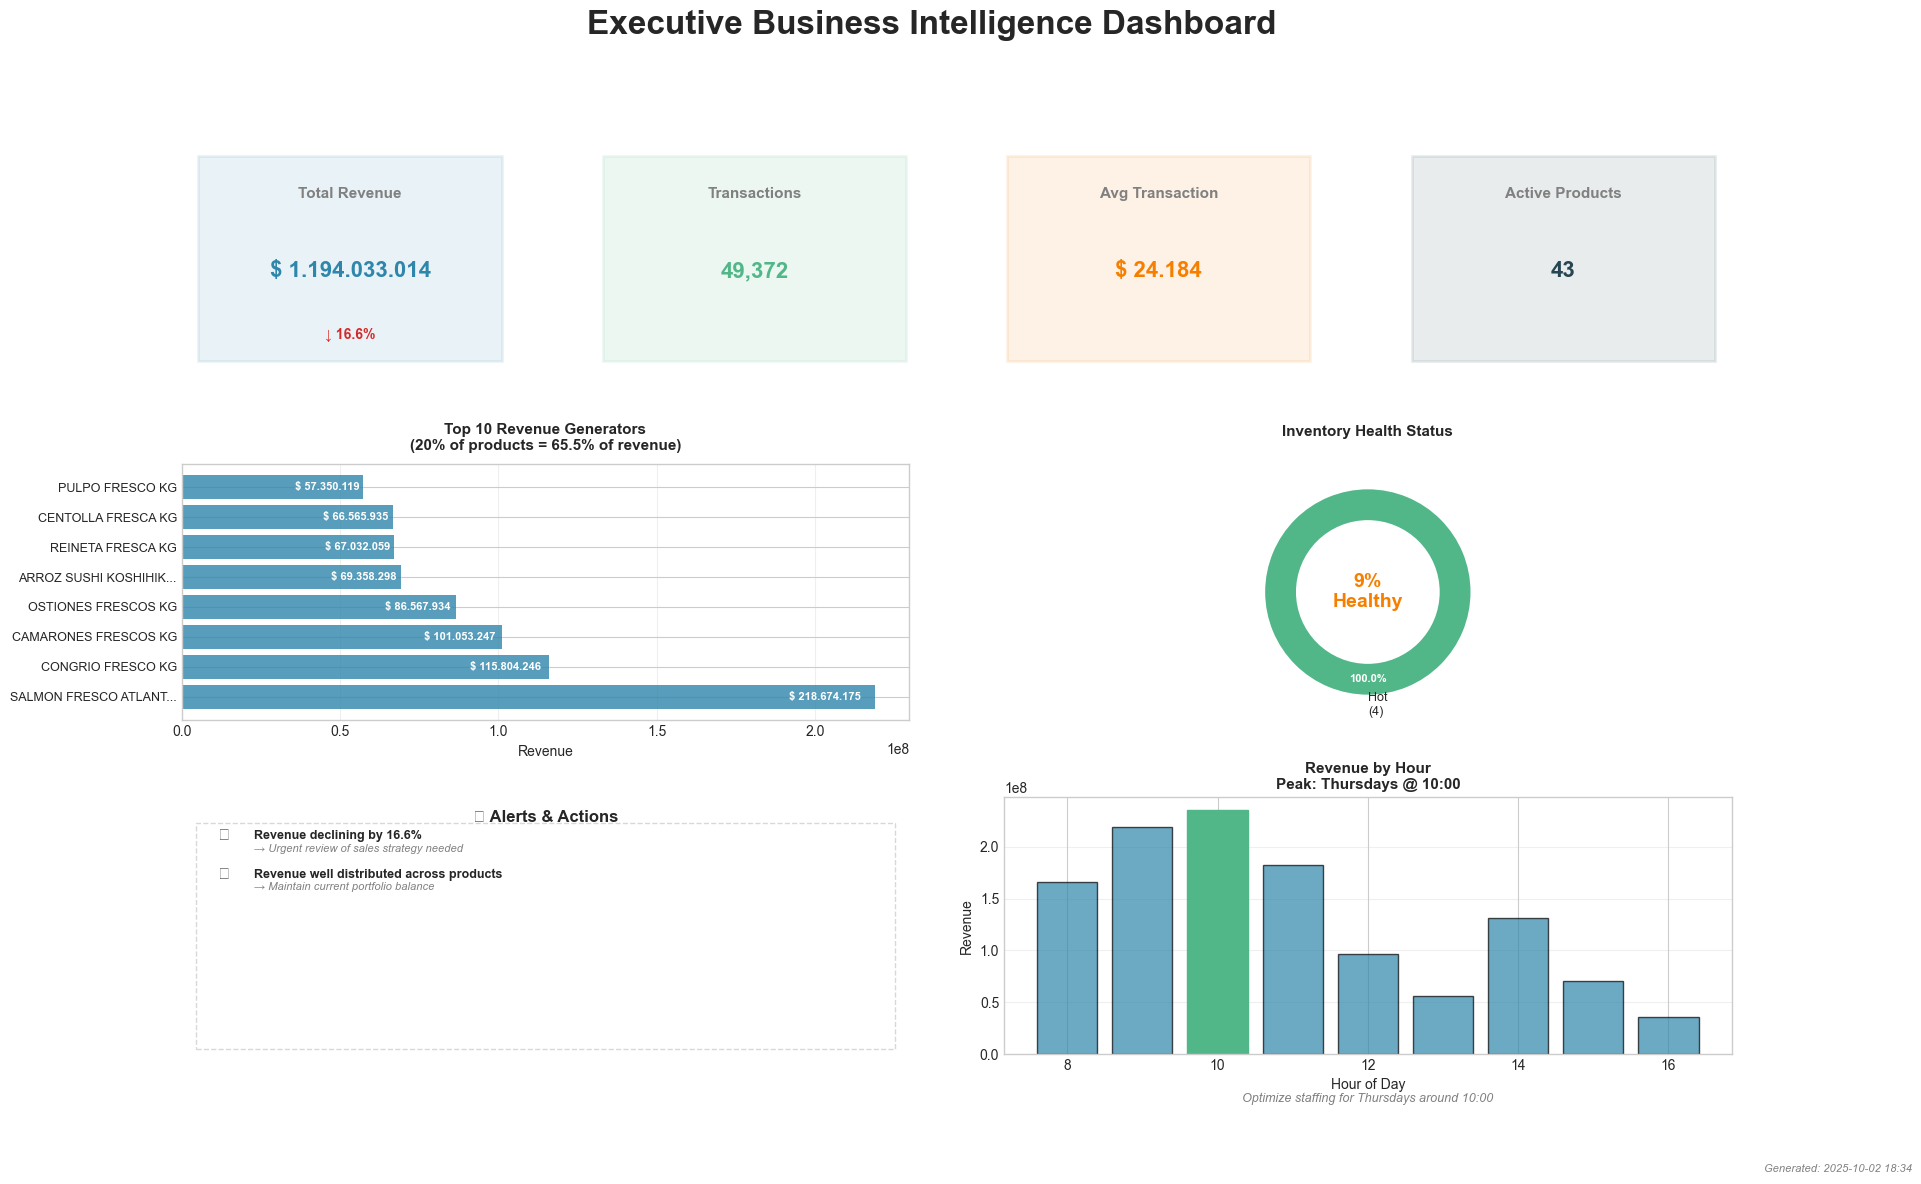

In [4]:
# Create and display the executive dashboard
fig = dashboard.create_full_dashboard(figsize=(20, 12))
print_fig(fig, dashboard.analyzer.out_dir, fn('DASH', 'executive', 'png'), save=save)

## 💰 Revenue Concentration Analysis
*Identify your star products and portfolio risk exposure*

In [5]:
pareto = analyzer.get_pareto_insights()
print_info(analyzer.print_pareto(), analyzer.out_dir, fn('BA', 'pareto'), save=save)

🎯 TOP INSIGHT: Your top 8 products (20.0% of catalog) generate 65.5% of revenue!

Concentration Risk Level: Medium

📋 Top 5 Revenue Generators:
  1. SALMON FRESCO ATLANTICO KG: $ 218.674.175
  2. CONGRIO FRESCO KG: $ 115.804.246
  3. CAMARONES FRESCOS KG: $ 101.053.247
  4. OSTIONES FRESCOS KG: $ 86.567.934
  5. ARROZ SUSHI KOSHIHIKARI 5KG: $ 69.358.298

📊 80/20 Rule: Top 20% = 65.5% of revenue


## 📦 Inventory Health Check
*Detect dead stock and optimize inventory investment*

In [6]:
inventory = analyzer.get_inventory_health()
print_info(analyzer.print_inventory_health(), analyzer.out_dir, fn('BA', 'inventory'), save=save)

📊 Inventory Health Score: 9%

⚠️ Dead Stock Alert: 0 products


## ⏰ Operational Efficiency
*Optimize staffing and resources based on peak demand patterns*

In [7]:
peak_times = analyzer.get_peak_times()
print_info(analyzer.print_peak_times(), analyzer.out_dir, fn('BA', 'peak_times'), save=save)

⏰ Peak Performance Windows:
  • Best Day: Thursdays
  • Peak Hour: 10:00
  • Slowest Day: Saturdays

💡 Optimize staffing for Thursdays around 10:00


## 🚨 Alerts & Action Items
*Critical issues requiring immediate attention and strategic opportunities*

In [8]:
alerts = analyzer.get_alerts()
print_info(analyzer.print_alerts(), analyzer.out_dir, fn('BA', 'alerts'), save=save)

🔴 CRITICAL ACTIONS REQUIRED:

  Revenue declining by 16.6%
  Impact: Negative business trend
  ➔ Action: Urgent review of sales strategy needed

🟢 SUCCESS INDICATORS:

  Revenue well distributed across products
  ➔ Next Step: Maintain current portfolio balance


## 💾 Export Summary Data
*Save key metrics for tracking trends over time*

In [ ]:
# Save executive summary as CSV for easy tracking over time
import pandas as pd

summary_dict = analyzer.get_executive_summary_dict()
summary_df = pd.DataFrame([summary_dict])

if save:
    save_path = os.path.join(analyzer.out_dir, fn('BA', 'executive_summary', 'csv'))
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    summary_df.to_csv(save_path, index=False)
    print(f"✅ Executive summary exported to {save_path}")
else:
    print(summary_df.to_string(index=False))

      Date  Total Revenue  Revenue Growth %  Total Transactions  Top 20% Revenue Share  Dead Stock Count  Inventory Health %
2025-03-01     1194033014        -16.586181               49372               65.52633                 0            9.302326


: 